# Dirty tricks for image classification: [Dogs vs Cats](https://www.kaggle.com/c/dogs-vs-cats/data) 

# by [Pavel Pleskov](https://www.linkedin.com/in/ppleskov/) from [Point API](https://pointapi.com/)

# https://ufile.io/2yeqr

In [85]:
import os
from os import listdir
from random import shuffle, choice, seed
from shutil import copy
from tqdm import tqdm
from time import sleep
from hashlib import md5, sha1, sha224
from PIL import Image

def ensure_dir(file_path):
    directory = os.path.dirname(file_path)
    if not os.path.exists(directory):
        os.makedirs(directory)
        
output = "../data/output/"
ensure_dir(output)

input = "../data/input/"
len(listdir(input))

1000

In [73]:
!ls ../data/

Death-Valley-NP-5.jpg  input  output


## Multiprocessing

In [55]:
from multiprocessing import Pool, cpu_count
import pandas as pd
from os import listdir

files = sorted(listdir(input))

files[:5]

['00dde5d716d6dd28e7fd1097f918401e62ffd303f722d93fd45e770f.jpg',
 '01caa242ba3c9730abbccb5c7b6ca2ba8c2b4b56525a02c29b11b25c.jpg',
 '0226a06b8f6e80bf440c08266ec8a48aebf6fb0cc06e8c0d800eec06.jpg',
 '024dbfec8fb0a0800f20d2e4faeabd0fcf4444cd8c6022eabfccc4e2.jpg',
 '037f68e0882f662f08dd2054ef7ded989df3339d4f33f07d1ee1ef42.jpg']

In [115]:
f = input+files[0]
print(f, "\n")

!date -r $f

../data/input/00dde5d716d6dd28e7fd1097f918401e62ffd303f722d93fd45e770f.jpg 

Вт янв 22 21:36:14 MSK 2019


In [60]:
!date --help

Usage: date [OPTION]... [+FORMAT]
  or:  date [-u|--utc|--universal] [MMDDhhmm[[CC]YY][.ss]]
Display the current time in the given FORMAT, or set the system date.

Mandatory arguments to long options are mandatory for short options too.
  -d, --date=STRING          display time described by STRING, not 'now'
      --debug                annotate the parsed date,
                              and warn about questionable usage to stderr
  -f, --file=DATEFILE        like --date; once for each line of DATEFILE
  -I[FMT], --iso-8601[=FMT]  output date/time in ISO 8601 format.
                               FMT='date' for date only (the default),
                               'hours', 'minutes', 'seconds', or 'ns'
                               for date and time to the indicated precision.
                               Example: 2006-08-14T02:34:56-06:00
  -R, --rfc-email            output date and time in RFC 5322 format.
                               Example: Mon, 14 Aug 2006 02:34:56 -0

In [116]:
def time(infile):
    str = "\'" + input + infile + "\'"
    res = !date -r $str +%T
    return res[0]
     
time(files[0])

'21:36:14'

In [100]:
r = []
for f in tqdm(files):
    r.append(time(f))

100%|██████████| 1000/1000 [00:09<00:00, 105.48it/s]


In [101]:
with Pool(cpu_count()) as pool:
    r = list(tqdm(pool.imap(time, files), total=len(files))) 

100%|██████████| 1000/1000 [00:03<00:00, 275.50it/s]


In [104]:
df = pd.DataFrame({"name":files,"time":r})
dates = list(df["time"])
df.to_csv(output + "./time.csv", index=False)
df.head()

name      time
0  00dde5d716d6dd28e7fd1097f918401e62ffd303f722d9...  21:36:14
1  01caa242ba3c9730abbccb5c7b6ca2ba8c2b4b56525a02...  21:36:15
2  0226a06b8f6e80bf440c08266ec8a48aebf6fb0cc06e8c...  21:36:18
3  024dbfec8fb0a0800f20d2e4faeabd0fcf4444cd8c6022...  21:36:18
4  037f68e0882f662f08dd2054ef7ded989df3339d4f33f0...  21:36:14

## META

In [105]:
from PIL import Image

def size(infile):
    infile = input+infile
    im = Image.open(infile)
    w,h = im.size
    return w,h

size(files[0])

(500, 374)

In [106]:
with Pool(cpu_count()) as pool:
    r = list(tqdm(pool.imap(size, files), total=len(files)))
    
r[0]

100%|██████████| 1000/1000 [00:00<00:00, 7879.56it/s]


(500, 374)

In [107]:
df = pd.DataFrame({"name":files,"w":[c[0] for c in r],"h":[c[1] for c in r]})

df["r"] = df["w"]/df["h"]
df["s"] = df["w"]+df["h"]
df["d"] = df["w"]-df["h"]

df["time"] = dates

df.to_csv(output + "./meta.csv",index=False)
df.head()

h                                               name    w         r    s  \
0  374  00dde5d716d6dd28e7fd1097f918401e62ffd303f722d9...  500  1.336898  874   
1  499  01caa242ba3c9730abbccb5c7b6ca2ba8c2b4b56525a02...  410  0.821643  909   
2  374  0226a06b8f6e80bf440c08266ec8a48aebf6fb0cc06e8c...  500  1.336898  874   
3  202  024dbfec8fb0a0800f20d2e4faeabd0fcf4444cd8c6022...  250  1.237624  452   
4  374  037f68e0882f662f08dd2054ef7ded989df3339d4f33f0...  500  1.336898  874   

     d      time  
0  126  21:36:14  
1  -89  21:36:15  
2  126  21:36:18  
3   48  21:36:18  
4  126  21:36:14

In [108]:
df = pd.read_csv(output + "./meta.csv")
df.sort_values(by="time", inplace=True)
df.reset_index(inplace=True, drop=True)
df

h       name    w         r    s    d      time
0    308   2445.jpg  400  1.298701  708   92  21:35:53
1    300   7326.jpg  242  0.806667  542  -58  21:35:53
2    469   3472.jpg  500  1.066098  969   31  21:35:53
3    145  12243.jpg  422  2.910345  567  277  21:35:53
4    375    374.jpg  499  1.330667  874  124  21:35:53
5    375   3645.jpg  499  1.330667  874  124  21:35:53
6    375   9096.jpg  499  1.330667  874  124  21:35:53
7    499   9965.jpg  375  0.751503  874 -124  21:35:53
8    216   1151.jpg  238  1.101852  454   22  21:35:53
9    298   1677.jpg  236  0.791946  534  -62  21:35:53
10   374   7817.jpg  500  1.336898  874  126  21:35:53
11   398   2991.jpg  500  1.256281  898  102  21:35:53
12   374  10436.jpg  500  1.336898  874  126  21:35:53
13   215   1325.jpg  288  1.339535  503   73  21:35:53
14   210   8753.jpg  288  1.371429  498   78  21:35:53
15   374   5482.jpg  500  1.336898  874  126  21:35:53
16   297  10513.jpg  500  1.683502  797  203  21:35:53
17   336  11283.jpg  500  1.488095  836  164  21:35:53
18   216  11304.jpg  251  1.162037  467   35  21:35:53
19   359    800.jpg  480  1.337047  839  121  21:35:53
20   374   5337.jpg  500  1.336898  874  126  21:35:53
21   410  10902.jpg  404  0.985366  814   -6  21:35:53
22   404   8230.jpg  499  1.235149  903   95  21:35:53
23   411  12129.jpg  487  1.184915  898   76  21:35:53
24   500   9831.jpg  401  0.802000  901  -99  21:35:53
25   374   1566.jpg  500  1.336898  874  126  21:35:53
26   375   6262.jpg  499  1.330667  874  124  21:35:53
27   110   4360.jpg  149  1.354545  259   39  21:35:53
28   284  11940.jpg  499  1.757042  783  215  21:35:53
29   500   2031.jpg  317  0.634000  817 -183  21:35:53
..   ...        ...  ...       ...  ...  ...       ...
970  402   2447.jpg  402  1.000000  804    0  21:36:33
971  402    242.jpg  402  1.000000  804    0  21:36:33
972  312   5137.jpg  312  1.000000  624    0  21:36:33
973  342  11568.jpg  342  1.000000  684    0  21:36:33
974  372   5900.jpg  372  1.000000  744    0  21:36:33
975  372   1848.jpg  372  1.000000  744    0  21:36:33
976  262  11328.jpg  262  1.000000  524    0  21:36:33
977  332   2548.jpg  332  1.000000  664    0  21:36:33
978  332   1822.jpg  332  1.000000  664    0  21:36:33
979  372  11161.jpg  372  1.000000  744    0  21:36:33
980  372   4553.jpg  372  1.000000  744    0  21:36:33
981  362   8678.jpg  362  1.000000  724    0  21:36:33
982   72   7893.jpg   72  1.000000  144    0  21:36:33
983  312   7882.jpg  312  1.000000  624    0  21:36:33
984  212   1029.jpg  212  1.000000  424    0  21:36:33
985  372     87.jpg  372  1.000000  744    0  21:36:33
986  362   5391.jpg  362  1.000000  724    0  21:36:33
987  492   8756.jpg  492  1.000000  984    0  21:36:33
988  372   4102.jpg  372  1.000000  744    0  21:36:33
989  252   4775.jpg  252  1.000000  504    0  21:36:33
990  142   3716.jpg  142  1.000000  284    0  21:36:33
991  333   8492.jpg  333  1.000000  666    0  21:36:33
992  422   2770.jpg  422  1.000000  844    0  21:36:33
993  462   2777.jpg  462  1.000000  924    0  21:36:33
994  393   2794.jpg  393  1.000000  786    0  21:36:33
995  193  12254.jpg  193  1.000000  386    0  21:36:33
996  412   9070.jpg  412  1.000000  824    0  21:36:33
997  192   7602.jpg  192  1.000000  384    0  21:36:33
998  182   9370.jpg  182  1.000000  364    0  21:36:33
999  132   9871.jpg  132  1.000000  264    0  21:36:33

[1000 rows x 7 columns]

## Task 0: date

In [109]:
dt = df.loc[:100-1]
dt.tail(10)

h       name    w         r    s    d      time
90  281   8468.jpg  350  1.245552  631   69  21:35:57
91  401  10838.jpg  383  0.955112  784  -18  21:35:57
92  399   3062.jpg  268  0.671679  667 -131  21:35:57
93  407   7709.jpg  296  0.727273  703 -111  21:35:57
94  493  10601.jpg  483  0.979716  976  -10  21:35:57
95  284     54.jpg  400  1.408451  684  116  21:35:57
96  399    786.jpg  300  0.751880  699  -99  21:35:57
97  499  10775.jpg  332  0.665331  831 -167  21:35:57
98  500   4422.jpg  346  0.692000  846 -154  21:35:57
99  351   1319.jpg  335  0.954416  686  -16  21:35:57

In [110]:
df.head(10)

h       name    w         r    s    d      time
0  308   2445.jpg  400  1.298701  708   92  21:35:53
1  300   7326.jpg  242  0.806667  542  -58  21:35:53
2  469   3472.jpg  500  1.066098  969   31  21:35:53
3  145  12243.jpg  422  2.910345  567  277  21:35:53
4  375    374.jpg  499  1.330667  874  124  21:35:53
5  375   3645.jpg  499  1.330667  874  124  21:35:53
6  375   9096.jpg  499  1.330667  874  124  21:35:53
7  499   9965.jpg  375  0.751503  874 -124  21:35:53
8  216   1151.jpg  238  1.101852  454   22  21:35:53
9  298   1677.jpg  236  0.791946  534  -62  21:35:53

In [111]:
dt.time.value_counts()

21:35:57    50
21:35:53    40
21:35:54    10
Name: time, dtype: int64

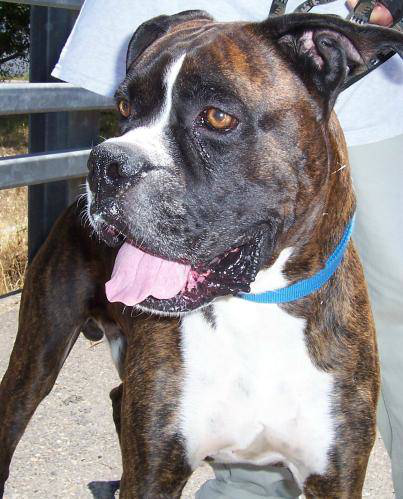

In [112]:
f = choice(list(dt[dt.time == "21:35:57"].name))
Image.open(input+f)

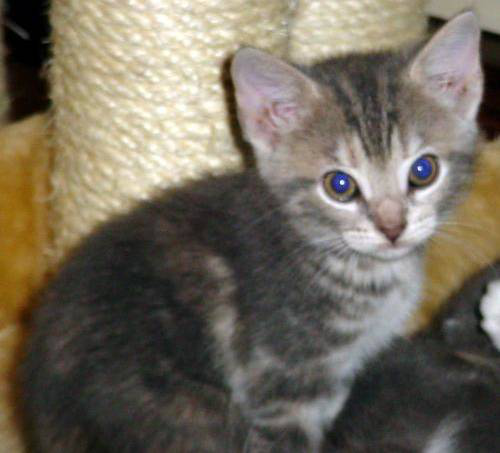

In [113]:
f = choice(list(dt[dt.time == "21:35:53"].name))
Image.open(input+f)

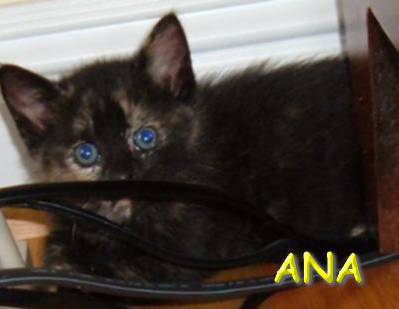

In [114]:
f = choice(list(dt[dt.time == "21:35:54"].name))
Image.open(input+f)

## Task 1: name (easy)

In [79]:
dt = df.loc[100:200-1]
dt.tail(3)

h       name    w         r    s    d      date
197  261  11199.JPG  350  1.340996  611   89  21:36:00
198  375  11908.JPG  499  1.330667  874  124  21:36:00
199  385  10490.JPG  468  1.215584  853   83  21:36:00

## Task 2: name (easy)

In [57]:
dt = df.loc[200:300-1]
dt.tail()

h          name    w         r    s    d      date
295  462  dog.7629.jpg  500  1.082251  962   38  21:36:04
296  375  dog.7040.jpg  499  1.330667  874  124  21:36:04
297  199  dog.6872.jpg  129  0.648241  328  -70  21:36:04
298  353  dog.6626.jpg  499  1.413598  852  146  21:36:04
299  272  dog.7083.jpg  192  0.705882  464  -80  21:36:04

## Task 3: name (intermediate)

In [58]:
dt = df.loc[300:400-1]
dt.tail()

h                        name    w         r    s    d      date
395  239             poodle.1553.jpg  320  1.338912  559   81  21:36:08
396  439  yorkshire_terrier.5534.jpg  320  0.728929  759 -119  21:36:08
397  355   golden_retriever.8591.jpg  325  0.915493  680  -30  21:36:08
398  379  golden_retriever.12113.jpg  366  0.965699  745  -13  21:36:08
399  359          shih_tzu.10091.jpg  287  0.799443  646  -72  21:36:08

## Task 4: name (easy) 

In [59]:
dt = df.loc[400:500-1]
dt.tail()

h                                          name    w         r    s  \
495  280          93d6e655a58cda13099d50ceb5fcda5b.jpg  480  1.714286  760   
496  407  91a628aec8629ce068808c0b9f0563b0326d7a87.jpg  499  1.226044  906   
497  400  837676651f3059439c179c1cacd3bd7f9621ad58.jpg  299  0.747500  699   
498  320  f405866065f7ff2c24890b8b57c74be6d05580df.jpg  277  0.865625  597   
499  421  fa77949bfb093141028d13c0a329453b95c65821.jpg  499  1.185273  920   

       d      date  
495  200  21:36:11  
496   92  21:36:11  
497 -101  21:36:11  
498  -43  21:36:11  
499   78  21:36:11

## Task 5: name (hard)

In [80]:
dt = df.loc[500:600-1]
dt.tail()

h                                               name    w         r  \
595  300  b4a93835034b852aa27a82a508caba2c83b9a5a3cb3b8b...  300  1.000000   
596  499  c847ca112983106b709517248866a00c61b24bc8ac6504...  340  0.681363   
597  499  b5bb37ab32a428bab9ba180bcab6a4bcba2a5211b472c2...  482  0.965932   
598  333  4164a9abb5b1ac21b2b773507c507a96c994849b647c65...  500  1.501502   
599  500  c02175415cb50ba139ca91b6c7c46b25c72bc5600442b0...  399  0.798000   

       s    d      date  
595  600    0  21:36:15  
596  839 -159  21:36:15  
597  981  -17  21:36:15  
598  833  167  21:36:15  
599  899 -101  21:36:15

## Task 6: name (hard)

In [62]:
dt = df.loc[600:700-1]
dt.tail()

h                                               name    w         r  \
695  224  3d333c1d775bb75579ee1e97fb7d11a3c5a975edf3739e...  300  1.339286   
696  200  3593bd9ded39f9391c97153bb579bb7efe1dc39db99b3f...  196  0.980000   
697  296  395aee779edc1135d3fa9b77adcf193f19cfc73515d737...  499  1.685811   
698  499  ecc002aef6ee0482de8b2dd0ef20044204d66a200e2820...  455  0.911824   
699  374  3cdb5fac99eccf3517a573137f3153d1d99177999f393f...  500  1.336898   

       s    d      date  
695  524   76  21:36:18  
696  396   -4  21:36:18  
697  795  203  21:36:18  
698  954  -44  21:36:18  
699  874  126  21:36:18

## Task 7: size (easy)

In [69]:
dt = df.loc[700:800-1]
dt.tail()

h      name    w         r     s    d      date
795  374  5017.jpg  561  1.500000   935  187  21:36:24
796  373  2685.jpg  559  1.498660   932  186  21:36:24
797  435  6657.jpg  652  1.498851  1087  217  21:36:24
798  247  8521.jpg  370  1.497976   617  123  21:36:24
799  409  4473.jpg  613  1.498778  1022  204  21:36:24

## Task 8: size (intermediate)

In [64]:
dt = df.loc[800:900-1]
dt.tail()

h       name    w         r    s   d      date
895  300  11883.jpg  350  1.166667  650  50  21:36:29
896  435   3862.jpg  485  1.114943  920  50  21:36:29
897  375   6037.jpg  425  1.133333  800  50  21:36:29
898  418   9186.jpg  468  1.119617  886  50  21:36:29
899  401   4621.jpg  451  1.124688  852  50  21:36:29

## Task 9: size (hard)

In [67]:
dt = df.loc[900:1000-1]
dt.tail()

h       name    w    r    s  d      date
995  482   6945.jpg  482  1.0  964  0  21:36:33
996  372   4854.jpg  372  1.0  744  0  21:36:33
997  232  11606.jpg  232  1.0  464  0  21:36:33
998  402   2447.jpg  402  1.0  804  0  21:36:33
999  132   9871.jpg  132  1.0  264  0  21:36:33

## Task 10: kaggle playground (hard)

[Plant Seedlings Classification](https://www.kaggle.com/c/plant-seedlings-classification/data)

[Dog Breed Identification](https://www.kaggle.com/c/dog-breed-identification/data)

[Invasive Species Monitoring](https://www.kaggle.com/c/invasive-species-monitoring/data)

## EXIF

In [11]:
#ImageMagick

f = "./../data/Death-Valley-NP-5.jpg"
!identify -verbose $f

Image: ./../data/Death-Valley-NP-5.jpg
  Format: JPEG (Joint Photographic Experts Group JFIF format)
  Mime type: image/jpeg
  Class: DirectClass
  Geometry: 2048x1365+0+0
  Resolution: 350x350
  Print size: 5.85143x3.9
  Units: PixelsPerInch
  Type: TrueColor
  Endianess: Undefined
  Colorspace: sRGB
  Depth: 8-bit
  Channel depth:
    red: 8-bit
    green: 8-bit
    blue: 8-bit
  Channel statistics:
    Pixels: 2795520
    Red:
      min: 0 (0)
      max: 255 (1)
      mean: 110.453 (0.433148)
      standard deviation: 48.0468 (0.188419)
      kurtosis: 1.15876
      skewness: 0.865283
      entropy: 0.922517
    Green:
      min: 0 (0)
      max: 201 (0.788235)
      mean: 80.5673 (0.31595)
      standard deviation: 31.1646 (0.122214)
      kurtosis: 1.7933
      skewness: 1.16123
      entropy: 0.878165
    Blue:
      min: 0 (0)
      max: 195 (0.764706)
      mean: 73.5835 (0.288563)
      standard deviation: 41.7386 (0.163681)
      kurtosis: -0.403592
      skewness: 0.728174
 

In [12]:
!identify -verbose $f  | grep "date:modify"

    date:modify: 2019-01-18T20:02:09+03:00


In [13]:
!identify -verbose $f  | grep  "Filesize"

  Filesize: 789KB


## Google Products

[Google Image Search](https://images.google.com/)

[Google Vision API](https://cloud.google.com/vision/)

[Google Search](https://www.google.com/)

## Additional Data

### Flickr

[Cats](https://www.flickr.com/search/?text=cats)

[Dogs](https://www.flickr.com/search/?text=dogs)

In [14]:
#apt-get install python3-bs4
#pip install beautifulsoup4
#https://www.crummy.com/software/BeautifulSoup/bs4/doc/

import requests
from bs4 import BeautifulSoup

url = "https://www.flickr.com/search/?text=dogs"
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')

print(soup.prettify())

<!DOCTYPE html>
<html class="no-js fluid html-search-photos-unified-page-view scrolling-layout " lang="en-us" xmlns:cc="http://creativecommons.org/ns#">
 <head>
  <meta content="137206539707334" property="fb:app_id"/>
  <meta content="Flickr" property="og:site_name"/>
  <meta content="2019-01-18T17:02:23.799Z" property="og:updated_time"/>
  <meta content="archive" name="robots"/>
  <meta content="archive" name="googlebot"/>
  <script type="application/ld+json">
   [{
			"@context": "http://schema.org",
			"@type": "WebSite",
			"name": "Flickr",
			"url": "https://www.flickr.com",
			"potentialAction": {
				"@type": "SearchAction",
				"target": "https://www.flickr.com/search?text={search_term_string}&structured=yes",
				"query-input": "required name=search_term_string"
			}
		},
		{
			"@context": "http://schema.org",
			"@type": "Organization",
			"url": "http://www.flickr.com",
			"logo": "https://www.flickr.com/images/opensearch-flickr-logo.png"
		},
		{
			"@context": "http://sc

In [15]:
for link in soup.find_all('a'):
    print(link.get('href'))

/
/explore
/explore
/photos/tags
/vr
/commons
/galleries
/map
/cameras
/photos/flickr/albums/72157639868074114/
https://blog.flickr.net/
/create
/account/upgrade/pro
/upload
/signin
/signup
/explore
/explore
/photos/tags
/commons
/galleries
/photos/flickr/albums/72157639868074114/
https://blog.flickr.net/
/account/upgrade/pro
/search/?text=dogs
/search/people/?username=dogs
/search/groups/?text=dogs
#
/search/?text=dogs&view_all=1
https://www.flickr.com/help/forum/en-us/72157651248603362/lastpage#reply
/about
/jobs
//blog.flickr.net/en
/services/developer
/help/guidelines
/abuse
/help/forum
/change_language.gne?lang=en-US&csrf=
/help/privacy
/help/terms
//help.flickr.com
http://flickr.tumblr.com/
https://www.facebook.com/flickr
https://twitter.com/flickr


### Yandex

[Cats](https://yandex.ru/images/search?text=cats)

[Dogs](https://yandex.ru/images/search?text=dogs)

In [17]:
from fake_useragent import UserAgent
ua = UserAgent()
headers = {'User-Agent':str(ua.random)}

s = requests.session()
url = "https://yandex.ru/images/search?text=cats"
page = s.get(url, headers=headers)
soup = BeautifulSoup(page.text, 'html.parser')

print(soup.prettify())

<!DOCTYPE html>
<html class="i-ua_js_no i-ua_css_standard" lang="ru">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <title>
   Яндекс.Картинки
  </title>
  <script nonce="3178466254291079811352">
   ;(function(d,e,c,r){e=d.documentElement;c="className";r="replace";e[c]=e[c][r]("i-ua_js_no","i-ua_js_yes");if(d.compatMode!="CSS1Compat")e[c]=e[c][r]("i-ua_css_standart","i-ua_css_quirks")})(document);;(function(d,e,c,n,w,v,f){e=d.documentElement;c="className";n="createElementNS";f="firstChild";w="http://www.w3.org/2000/svg";e[c]+=" i-ua_svg_"+(!!d[n]&&!!d[n](w,"svg").createSVGRect?"yes":"no");v=d.createElement("div");v.innerHTML="<svg/>";e[c]+=" i-ua_inlinesvg_"+((v[f]&&v[f].namespaceURI)==w?"yes":"no");})(document);;(function(d,e,s,o,p){e=d.documentElement;s=e.style;o="object-fit";p="OObjectFit";e.className+=(o in s||p in s)?"":" i-ua_"+o+"_no"})(document);;(function(w,e,s,c,x,l,p,d){c="className";x="deviceXDPI";l="logicalXDPI";p="devicePixel

In [18]:
l = []
for link in soup.find_all('a'):
    href = link.get('href')
    if href and href.endswith("&text=cats&rpt=simage"):
        print(href)
        l.append(href)

/images/search?pos=0&img_url=https%3A%2F%2Fcs8.pikabu.ru%2Fpost_img%2F2016%2F06%2F29%2F9%2F14672107991100355570.jpg&text=cats&rpt=simage
/images/search?pos=1&img_url=https%3A%2F%2Fcs8.pikabu.ru%2Fpost_img%2F2018%2F01%2F03%2F6%2Fog_og_1514970948269520343.jpg&text=cats&rpt=simage
/images/search?pos=2&img_url=https%3A%2F%2Fimages.petsforall.net%2Farticles%2F67%2Foriginal%2Fcat-300572_1920.jpg%3F1498546581&text=cats&rpt=simage
/images/search?pos=3&img_url=https%3A%2F%2Fi.loli.net%2F2018%2F02%2F05%2F5a786f90c2970.jpg&text=cats&rpt=simage
/images/search?pos=4&img_url=https%3A%2F%2Fwww.zastavki.com%2Fpictures%2Foriginals%2F2017Animals___Cats_Beautiful_British_cat_with_lilac_flowers_116288_.jpg&text=cats&rpt=simage
/images/search?pos=5&img_url=https%3A%2F%2Fcs4.pikabu.ru%2Fpost_img%2Fbig%2F2015%2F05%2F22%2F9%2F1432304692_1208616173.jpg&text=cats&rpt=simage
/images/search?pos=6&img_url=https%3A%2F%2Fthewallpaper.co%2Fwp-content%2Fuploads%2F2017%2F07%2Fgrass-outdoorsnature-backgrounds-high-defin

In [15]:
url = "https://yandex.ru"+l[0]

page = s.get(url, headers=headers)
soup = BeautifulSoup(page.text, 'html.parser')

print(soup.prettify())

<!DOCTYPE html>
<html class="i-ua_js_no i-ua_css_standard" lang="ru">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <title>
   Яндекс.Картинки
  </title>
  <script nonce="0179407585438984913528">
   ;(function(d,e,c,r){e=d.documentElement;c="className";r="replace";e[c]=e[c][r]("i-ua_js_no","i-ua_js_yes");if(d.compatMode!="CSS1Compat")e[c]=e[c][r]("i-ua_css_standart","i-ua_css_quirks")})(document);;(function(d,e,c,n,w,v,f){e=d.documentElement;c="className";n="createElementNS";f="firstChild";w="http://www.w3.org/2000/svg";e[c]+=" i-ua_svg_"+(!!d[n]&&!!d[n](w,"svg").createSVGRect?"yes":"no");v=d.createElement("div");v.innerHTML="<svg/>";e[c]+=" i-ua_inlinesvg_"+((v[f]&&v[f].namespaceURI)==w?"yes":"no");})(document);;(function(d,e,s,o,p){e=d.documentElement;s=e.style;o="object-fit";p="OObjectFit";e.className+=(o in s||p in s)?"":" i-ua_"+o+"_no"})(document);;(function(w,e,s,c,x,l,p,d){c="className";x="deviceXDPI";l="logicalXDPI";p="devicePixel

'https://yandex.ru/images/search?pos=0&img_url=https%3A%2F%2Fcs8.pikabu.ru%2Fpost_img%2F2016%2F06%2F29%2F9%2F14672107991100355570.jpg&text=cats&rpt=simage'

### Selenium

[Selenium](https://www.seleniumhq.org/)

[YouTube](https://www.youtube.com/results?search_query=selenium+python)

In [21]:
# https://github.com/mozilla/geckodriver/releases
# /usr/local/bin

from selenium import webdriver
from selenium.webdriver.common.keys import Keys

driver = webdriver.Firefox()
driver.get("https://yandex.ru/images/search?text=cats")

#assert "Python" in driver.title
#elem = driver.find_element_by_name("q")
#elem.clear()
#elem.send_keys("pycon")
#elem.send_keys(Keys.RETURN)
#assert "No results found." not in driver.page_source

#driver.close()

## Amazon Mechanical Turk

![](https://i.imgur.com/U0F0vK4.jpg)

[Amazon Turk](https://www.mturk.com/)